In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [25]:
dataset = pd.read_csv('/content/delivery_time.csv')

In [26]:
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [27]:
dataset.columns = ['DeliveryTime', 'SortingTime']

In [28]:
dataset

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


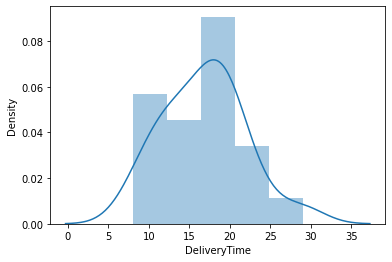

In [29]:
#Visualisation
sns.distplot(dataset['DeliveryTime'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


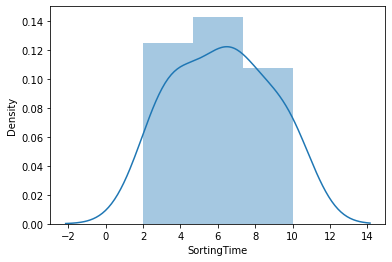

In [30]:
sns.distplot(dataset['SortingTime'])

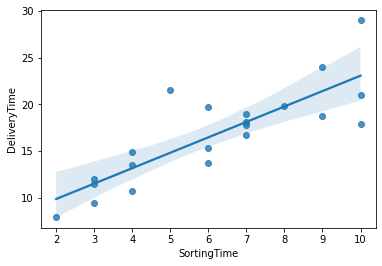

In [31]:
sns.regplot(x=dataset['SortingTime'],y=dataset['DeliveryTime'])

In [32]:
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [33]:
X

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [34]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [36]:
model = smf.ols("DeliveryTime~SortingTime",data = dataset).fit() #ordinary least squaring method

In [37]:
y

array([10,  4,  6,  9, 10,  6,  7,  3, 10,  9,  8,  4,  7,  3,  3,  4,  6,
        7,  2,  7,  5])

In [45]:
#Predict for sorting time 7,10
newdata=pd.Series([7,10])
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
print(newdata)
print(data_pred)

0     7
1    10
dtype: int64
   SortingTime
0            7
1           10


In [43]:
model.pvalues

Intercept      0.001147
SortingTime    0.000004
dtype: float64

In [47]:
model.predict(data_pred) # for sorting time 7 and 10


0    18.125873
1    23.072933
dtype: float64

In [48]:
#model parameter
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [50]:
# Manually calculate for 5 and 6 years experience salary
DeliveryTime_7 = (6.582734) + (1.649020)*(7)
DeliveryTime_10 = (6.582734) + (1.649020)*(10)
print('For Sorting time 7, Delivery time - ', DeliveryTime_7)
print('For Sorting time 10, Delivery time- ', DeliveryTime_10)

For Sorting time 7, Delivery time - -  18.125874
For Sorting time 10, Delivery time-  -  23.072933999999997


Predicted value and calculated value are correct for Delivey time against sorting time of 7 nd 10